In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = pd.read_csv('/content/drive/MyDrive/datasets/iris (1).txt',
                   sep=';',
                   decimal=',',
                   names=['slength', 'swidth', 'plength', 'pwidth', 'iclass'])

## **1. Correlation analysis of continuous and ordinal data**

Pearson correlation

In [2]:
iris['slength'].corr(iris['swidth'])

-0.10936924995064937

We can display correlation coefficients between all continuous value attributes of the DataFrame in the correlation matrix:

In [3]:
iris.corr(method='pearson')

<ipython-input-3-91787148d87f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr(method='pearson')


,slength,swidth,plength,pwidth
slength,1.000000,-0.109369,0.871754,0.817954
swidth,-0.109369,1.000000,-0.420516,-0.356544
plength,0.871754,-0.420516,1.000000,0.962757
pwidth,0.817954,-0.356544,0.962757,1.000000


In [4]:
#looks better
iris.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=None)

<ipython-input-4-a3dfa0912269>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=None)


,slength,swidth,plength,pwidth
slength,1.0,-0.11,0.87,0.82
swidth,-0.11,1.0,-0.42,-0.36
plength,0.87,-0.42,1.0,0.96
pwidth,0.82,-0.36,0.96,1.0


<ipython-input-5-a65636d78857>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(iris.corr(method='pearson'), cmap='coolwarm')


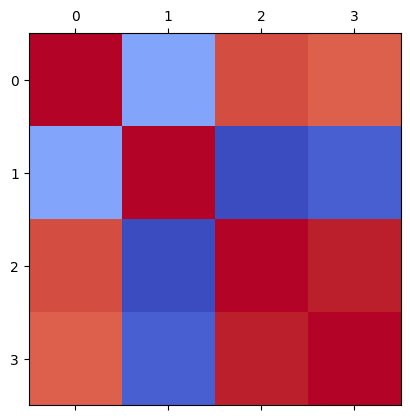

In [5]:
#heatmap
plt.matshow(iris.corr(method='pearson'), cmap='coolwarm')
plt.show()

<ipython-input-6-de6158b47cea>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cax = ax.matshow(iris.corr(method='pearson'), cmap='coolwarm')


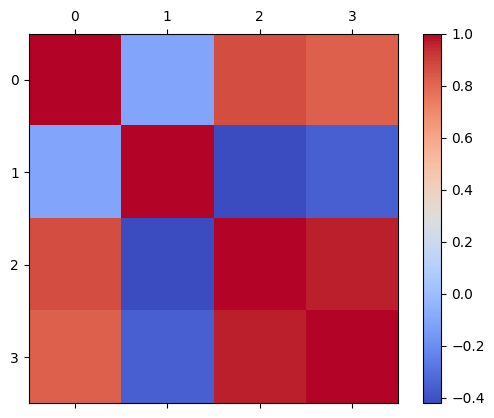

In [6]:
#colorbar
fig1 = plt.figure()
ax = fig1.add_subplot(111)
cax = ax.matshow(iris.corr(method='pearson'), cmap='coolwarm')
ax.xticklabels=iris[1:4]
fig1.colorbar(cax)
plt.show()

<ipython-input-7-fa15519d6f85>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_result = iris.corr(method='pearson')


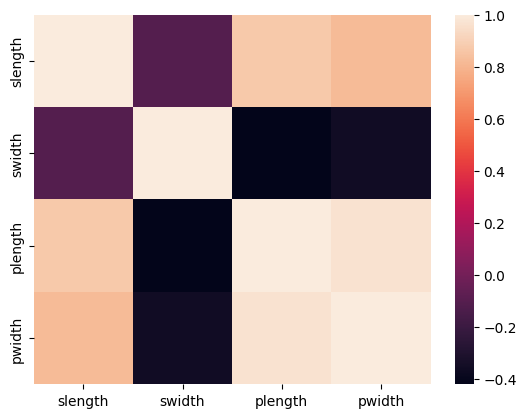

In [7]:
import seaborn as sns
corr_result = iris.corr(method='pearson')
sns.heatmap(corr_result,
            xticklabels=corr_result.columns.values,
            yticklabels=corr_result.columns.values)
plt.show()

Spearman rank correlation

In [8]:
df1 = pd.DataFrame()
df1['Profit'] = [8, 10, 9, 5, 2, 7, 3, 4, 1, 6]
df1['Liquidity'] = [5, 8, 10, 4, 3, 7, 1, 6, 2, 9]
df1

,Profit,Liquidity
0,8,5
1,10,8
2,9,10
3,5,4
4,2,3
5,7,7
6,3,1
7,4,6
8,1,2
9,6,9


In [9]:
df1.corr(method='spearman')

,Profit,Liquidity
Profit,1.000000,0.793939
Liquidity,0.793939,1.000000


Kendall rank correlation

In [10]:
df1.corr(method='kendall')

,Profit,Liquidity
Profit,1.0,0.6
Liquidity,0.6,1.0


**Correlation analysis of nominal/binary data**

Chi square test


|           | Fekete |  Fehér | Sárga/Narancs |
| ----------|:------:| :-----:| :------------:|
| Kontroll  | 491    | 377    | 31            |
| Balestes  | 213    | 112    | 8             |

In [11]:
import scipy.stats as stats

obs = np.array([[491, 377, 31], [213, 112, 8]])
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('chi2 = ' + str(chi2))
print('p = ' + str(p))
print('degree of freedom = ' + str(dof))
print('expected values = ')
print(expected)

chi2 = 8.77471206682259
p = 0.012433559716419771
degree of freedom = 2
expected values = 
[[513.71428571 356.82711039  28.4586039 ]
 [190.28571429 132.17288961  10.5413961 ]]


Cramér's V

In [12]:
obs = np.array([[491, 377, 31], [213, 112, 8]])

# Chi-square statistics
chi2, p, dof, expected = stats.chi2_contingency(np.array(obs))
n = obs.sum()
c = obs.shape[1]
r = obs.shape[0]

# Cramer's V
V = np.sqrt(chi2 / (n * min(c - 1, r - 1)))
print ("V value: ",V)

V value:  0.08439390512987466
